# Quick Parameter Check

In this notebook, you can quickly see the overview of how different cluster search parameters affect your results. It uses [PosgenPy](https://github.com/PrzemyslawKlups/posgenpy.git) which is a simple python drive for [POSGEN](http://apttools.sourceforge.net). 

It will iterate through given values, creating necessary files in the designated folder and run Maximum Separation Method for cluster search. For correct estimation of the real to random clusters in your data, each analysis will be run with additional of 5 (or more) relabelled runs. The graphs from [Williams et al. 2013](https://doi.org/10.1016/j.ultramic.2012.12.011) paper will be reproduced on your data and correct value for $N_{min}$ will be found. You will be able to see the average cluster composition for each value of the parameter that you selected for iteration and see how its affected by it.

In the first step, we'll go through different $d_{max}$ values. Cells which require your input start just like the one below 

In [1]:
######################### INPUT REQUIRED #########################
your_input = "Example"

In [1]:
import posgenpy as pgp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import subprocess
import pandas
from time import perf_counter
from datetime import timedelta
import sys

In [2]:
######################### INPUT REQUIRED #########################

output_folder = "/home/pklups/posgenpy/examples/" # put "/" at the end
posgen_folder = "/home/pklups/apttools-posgen-code/" # put "/" at the end
pos_file_path= "/home/pklups/posgenpy/posgenpyTest_easy.pos" 
range_file_path="/home/pklups/posgenpy/examples/posgenpyTest.rrng" 
random_runs = 20
dtd_location = "/home/pklups/apttools-posgen-code/"
core_ions = ["Cu", "Ni"]
bulk_ions = ["Fe"]

In [3]:

#Check for pos file existing, 
if not os.path.isfile(pos_file_path) and not len(pos_file_path):
    #This is hard-coded in the XML file. Could switch to -pos generation.
    pos_file_path = "posgenpyTest_easy.pos"

    #Generate the file using the example
    print('Generating synthetic pos input')

    if not subprocess.call([posgen_folder+"posgen", output_folder+"generateTestPos_easy.xml"]) == 0:
        print('Generating example pos using posgen failed')
        assert(False)
    else:
        print('Complete')
    
    range_file_path="examples/posgenpyTest.rrng"
        
else:
    print("File found")


if not os.path.isfile(pos_file_path):
    print(f'input pos file not found {pos_file_path}')
    assert(False)

File found


Quick fix: change the location of the dtd file in the xml file manually. In my case, the first line of posgen:
```<!DOCTYPE posscript SYSTEM "/home/pklups/apttools-posgen-code/posscript.dtd">```

### Iterate through multiple dmax values with random data

In [4]:
######################### INPUT REQUIRED #########################

# add or remove values in this list
# you can also create the same list for different parameter
dmax_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

In [5]:
xml_files = []
output_basename="output_dmax_{dm}"

for i, dm in enumerate(dmax_values):
    thisName = output_basename.format(dm=dm)
    xml_output = pgp.write_xml_with_relabelling(xmlFileName=thisName,
                                                posFile=pos_file_path,
                                                rangeFile=range_file_path,
                                                coreIons=core_ions,
                                                bulkIons=bulk_ions,
                                                relabelled_runs=random_runs,
                                                destination_folder=output_folder,
                                                nminV=2,
                                                dmax=dm,
                                                dtd_file_location=dtd_location
                                  )
    output_file = output_folder + str(thisName) + ".xml"
    xml_files.append(output_file)

In [6]:
for x in xml_files:
    print(x)

/home/pklups/posgenpy/examples/output_dmax_0.2.xml
/home/pklups/posgenpy/examples/output_dmax_0.3.xml
/home/pklups/posgenpy/examples/output_dmax_0.4.xml
/home/pklups/posgenpy/examples/output_dmax_0.5.xml
/home/pklups/posgenpy/examples/output_dmax_0.6.xml
/home/pklups/posgenpy/examples/output_dmax_0.7.xml


In [7]:
os.chdir(posgen_folder)
current_directory = os.getcwd()
os.chdir(posgen_folder)
print(os.getcwd())

tic = perf_counter()
for i, xml_file in enumerate(xml_files):
    posgen_output = subprocess.call(["./posgen", xml_file])
    toc = perf_counter()
    time_for_file = pgp.seconds_to_hhmmss((toc-tic))
    print(f"File: {i+1}/{len(xml_files)} analysed. It took {time_for_file}.")
    tic = perf_counter()

os.chdir(current_directory)
print(os.getcwd())

/home/pklups/apttools-posgen-code
File: 1/6 analysed. It took 0h 0m 6s.
File: 2/6 analysed. It took 0h 0m 6s.
File: 3/6 analysed. It took 0h 0m 6s.
File: 4/6 analysed. It took 0h 0m 7s.
File: 5/6 analysed. It took 0h 0m 7s.
File: 6/6 analysed. It took 0h 0m 8s.
/home/pklups/apttools-posgen-code


### Plotting threshold value
$(N_{real} - N_{rand})/N_{real}$

/home/pklups/posgenpy/posgenpy.py:393: RuntimeWarning: invalid value encountered in true_divide
  y_values = (real_local - random_local) / real_local
/home/pklups/posgenpy/posgenpy.py:393: RuntimeWarning: invalid value encountered in true_divide
  y_values = (real_local - random_local) / real_local
/home/pklups/posgenpy/posgenpy.py:393: RuntimeWarning: invalid value encountered in true_divide
  y_values = (real_local - random_local) / real_local
/home/pklups/posgenpy/posgenpy.py:393: RuntimeWarning: invalid value encountered in true_divide
  y_values = (real_local - random_local) / real_local


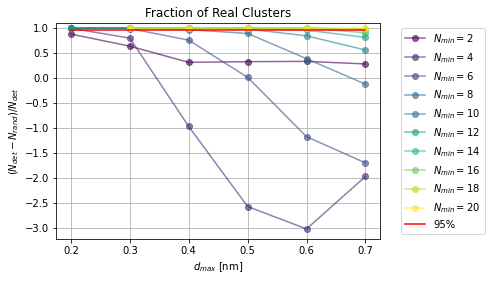

In [8]:
n_min_values = list(range(2, 21, 2))

pgp.plot_real_cluster_ratio_across_swept_param(
    swept_parameters=dmax_values,
    swept_parameter_name="$d_{max}$ [nm]",
    random_runs=random_runs,
    xml_files=xml_files,
    n_min_values=n_min_values
)

# plt.ylim(0.5, 1.05)

(0.0, 200.0)

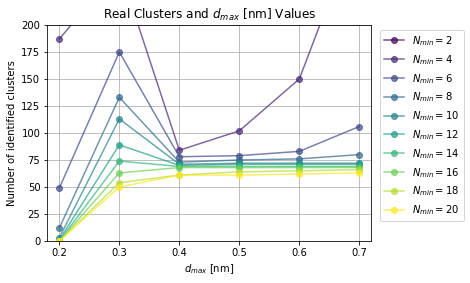

In [10]:
pgp.plot_real_clusters_across_swept_param(
    swept_parameters=dmax_values,
    swept_parameter_name="$d_{max}$ [nm]",
    random_runs=random_runs,
    xml_files=xml_files,
    n_min_values=n_min_values
)
# plt.plot([0, 1], [100, 100], 'r-', alpha=0.5)
plt.xlim(0.18, 0.72)
plt.ylim(0, 200)


## Find optimal N_min

Find the smallest $N_{min}$ value for each file that satisfies given threshold of real clusters. Default value = 95%

In [11]:
optimal_n_min_values = pgp.find_smallest_nmin(
    swept_parameters=dmax_values,
    swept_parameter_name="d_max",
    random_runs=random_runs,
    xml_files=xml_files,
    n_min_values=list(range(1, 100, 1)) # go through evey n_min possible up to a high number
)

print(optimal_n_min_values)

d_max: 0.2 | n_min: 4 | fraction: 0.995 | real clusters: 187
d_max: 0.3 | n_min: 6 | fraction: 0.989 | real clusters: 175
d_max: 0.4 | n_min: 8 | fraction: 0.966 | real clusters: 73
d_max: 0.5 | n_min: 9 | fraction: 0.969 | real clusters: 74
d_max: 0.6 | n_min: 12 | fraction: 0.956 | real clusters: 71
d_max: 0.7 | n_min: 16 | fraction: 0.964 | real clusters: 68
[4, 6, 8, 9, 12, 16]


## Plotting cluster composition 

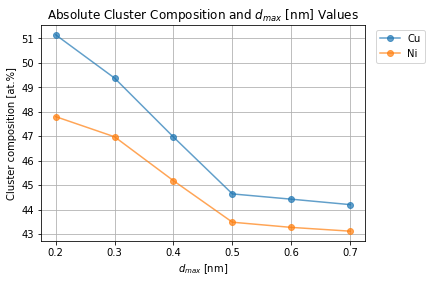

In [12]:
# retrieve the data needed from the cluster stats files for the composition plots
pgp.plot_cluster_composition_across_swept_param_absolute(
    swept_parameters=dmax_values,
    core_ions=core_ions,
    xml_files=xml_files,
    n_min_values_for_swept_parameters=optimal_n_min_values,
    swept_parameter_name="$d_{max}$ [nm]",
    exclude_ions=None
)

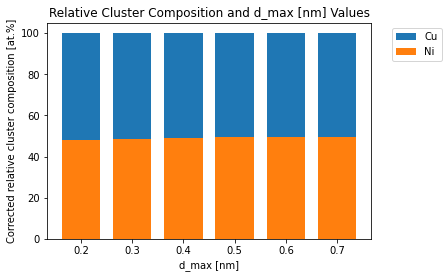

In [13]:
pgp.plot_cluster_composition_across_swept_param_relative(
    swept_parameters=dmax_values,
    core_ions=core_ions,
    xml_files=xml_files,
    n_min_values_for_swept_parameters=optimal_n_min_values,
    swept_parameter_name="d_max [nm]",
    exclude_ions=None
)

## What to do next?

If you're happy with your dmax selection, you can do the same parameter check but with order (kNN) values.

In [14]:
######################### INPUT REQUIRED #########################

# add or remove values in this list
# you can also create the same list for different parameter
order_values = [2, 3, 4, 5, 6, 7]
d_max = 0.5 # select dmax, hopefully the graphs above can help

In [19]:
xml_files = []
output_basename="output_dmax{d_max}_order_{order}"

for i, param_value in enumerate(order_values):
    thisName = output_basename.format(d_max=d_max, order=param_value)
    xml_output = pgp.write_xml_with_relabelling(xmlFileName=thisName,
                                                posFile=pos_file_path,
                                                rangeFile=range_file_path,
                                                coreIons=core_ions,
                                                bulkIons=bulk_ions,
                                                relabelled_runs=random_runs,
                                                destination_folder=output_folder,
                                                nminV=2,
                                                dmax=d_max,
                                                dtd_file_location=dtd_location,
                                                dclassify=d_max,
                                                knn=param_value
                                                
                                  )
    output_file = output_folder + str(thisName) + ".xml"
    xml_files.append(output_file)

In [20]:
# check if the xml files have been created
for x in xml_files:
    print(x)

/home/pklups/posgenpy/examples/output_dmax0.5_order_2.xml
/home/pklups/posgenpy/examples/output_dmax0.5_order_3.xml
/home/pklups/posgenpy/examples/output_dmax0.5_order_4.xml
/home/pklups/posgenpy/examples/output_dmax0.5_order_5.xml
/home/pklups/posgenpy/examples/output_dmax0.5_order_6.xml
/home/pklups/posgenpy/examples/output_dmax0.5_order_7.xml


In [21]:
current_directory = os.getcwd()
os.chdir(posgen_folder)
print(os.getcwd())

tic = perf_counter()
for i, xml_file in enumerate(xml_files):
    posgen_output = subprocess.call(["./posgen", xml_file])
    toc = perf_counter()
    time_for_file = pgp.seconds_to_hhmmss((toc-tic))
    print(f"File: {i+1}/{len(xml_files)} analysed. It took {time_for_file}.")
    tic = perf_counter()
    
os.chdir(current_directory)
print(os.getcwd())

/home/pklups/apttools-posgen-code
File: 1/6 analysed. It took 0h 0m 7s.
File: 2/6 analysed. It took 0h 0m 6s.
File: 3/6 analysed. It took 0h 0m 6s.
File: 4/6 analysed. It took 0h 0m 6s.
File: 5/6 analysed. It took 0h 0m 6s.
File: 6/6 analysed. It took 0h 0m 6s.
/home/pklups/apttools-posgen-code


### Plotting threshold value
$(N_{real} - N_{rand})/N_{real}$

(0.5, 1.05)

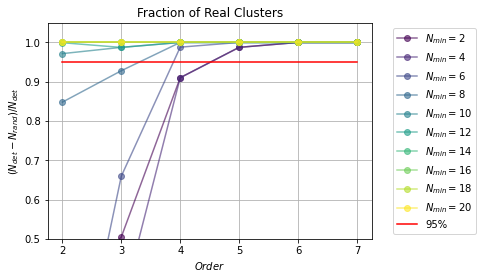

In [22]:
n_min_values = list(range(2, 21, 2))

pgp.plot_real_cluster_ratio_across_swept_param(
    swept_parameters=order_values,
    swept_parameter_name="$Order$",
    random_runs=random_runs,
    xml_files=xml_files,
    n_min_values=n_min_values
)

plt.ylim(0.5, 1.05)

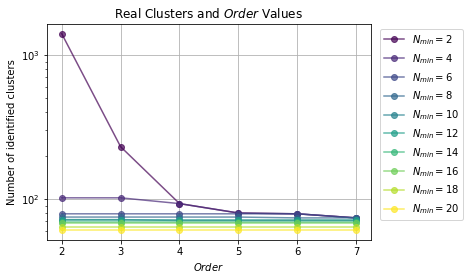

In [23]:
pgp.plot_real_clusters_across_swept_param(
    swept_parameters=order_values,
    swept_parameter_name="$Order$",
    random_runs=random_runs,
    xml_files=xml_files,
    n_min_values=n_min_values
)

plt.yscale("log")

## Find optimal N_min

Find the smallest $N_{min}$ value for each file that satisfies given threshold of real clusters. Default value = 95%

In [24]:
optimal_n_min_values = pgp.find_smallest_nmin(
    swept_parameters=order_values,
    swept_parameter_name="order",
    random_runs=random_runs,
    xml_files=xml_files,
    n_min_values=list(range(1, 100, 1)) # go through evey n_min possible up to a high number
)

print(optimal_n_min_values)

order: 2 | n_min: 9 | fraction: 0.957 | real clusters: 74
order: 3 | n_min: 9 | fraction: 0.966 | real clusters: 74
order: 4 | n_min: 6 | fraction: 0.988 | real clusters: 79
order: 5 | n_min: 1 | fraction: 0.988 | real clusters: 80
order: 6 | n_min: 1 | fraction: 1.0 | real clusters: 79
order: 7 | n_min: 1 | fraction: 1.0 | real clusters: 74
[9, 9, 6, 1, 1, 1]


## Plotting cluster composition

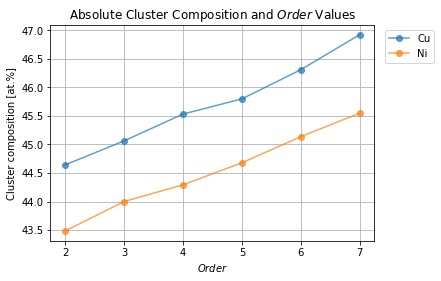

In [25]:
# retrieve the data needed from the cluster stats files for the composition plots
pgp.plot_cluster_composition_across_swept_param_absolute(
    swept_parameters=order_values,
    core_ions=core_ions,
    xml_files=xml_files,
    n_min_values_for_swept_parameters=optimal_n_min_values,
    swept_parameter_name="$Order$",
    exclude_ions=None
)

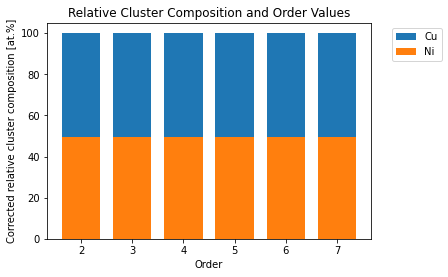

In [26]:
pgp.plot_cluster_composition_across_swept_param_relative(
    swept_parameters=order_values,
    core_ions=core_ions,
    xml_files=xml_files,
    n_min_values_for_swept_parameters=optimal_n_min_values,
    swept_parameter_name="Order",
    exclude_ions=None
)

# $d_{max}$ sweep at specified Order

In [27]:
######################### INPUT REQUIRED #########################

# add or remove values in this list
# you can also create the same list for different parameter
d_max_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
order = 5 # select dmax, hopefully the graphs above can help

In [30]:
xml_files = []
output_basename="output_order{order}_dmax{d_max}"

for i, d_max in enumerate(d_max_values):
    thisName = output_basename.format(order=order, d_max=d_max)
    xml_output = pgp.write_xml_with_relabelling(xmlFileName=thisName,
                                                posFile=pos_file_path,
                                                rangeFile=range_file_path,
                                                coreIons=core_ions,
                                                bulkIons=bulk_ions,
                                                relabelled_runs=random_runs,
                                                destination_folder=output_folder,
                                                nminV=2,
                                                dmax=d_max,
                                                dtd_file_location=dtd_location,
                                                dclassify=d_max,
                                                knn=order
                                                
                                  )
    output_file = output_folder + str(thisName) + ".xml"
    xml_files.append(output_file)

In [31]:
# check if the xml files have been created
for x in xml_files:
    print(x)

/home/pklups/posgenpy/examples/output_order5_dmax0.2.xml
/home/pklups/posgenpy/examples/output_order5_dmax0.3.xml
/home/pklups/posgenpy/examples/output_order5_dmax0.4.xml
/home/pklups/posgenpy/examples/output_order5_dmax0.5.xml
/home/pklups/posgenpy/examples/output_order5_dmax0.6.xml
/home/pklups/posgenpy/examples/output_order5_dmax0.7.xml


In [32]:
current_directory = os.getcwd()
os.chdir(posgen_folder)
print(os.getcwd())

tic = perf_counter()
for i, xml_file in enumerate(xml_files):
    posgen_output = subprocess.call(["./posgen", xml_file])
    toc = perf_counter()
    time_for_file = pgp.seconds_to_hhmmss((toc-tic))
    print(f"File: {i+1}/{len(xml_files)} analysed. It took {time_for_file}.")
    tic = perf_counter()
    
os.chdir(current_directory)
print(os.getcwd())

/home/pklups/apttools-posgen-code
File: 1/6 analysed. It took 0h 0m 6s.
File: 2/6 analysed. It took 0h 0m 6s.
File: 3/6 analysed. It took 0h 0m 6s.
File: 4/6 analysed. It took 0h 0m 6s.
File: 5/6 analysed. It took 0h 0m 6s.
File: 6/6 analysed. It took 0h 0m 7s.
/home/pklups/apttools-posgen-code


/home/pklups/posgenpy/posgenpy.py:393: RuntimeWarning: invalid value encountered in true_divide
  y_values = (real_local - random_local) / real_local
/home/pklups/posgenpy/posgenpy.py:393: RuntimeWarning: invalid value encountered in true_divide
  y_values = (real_local - random_local) / real_local
/home/pklups/posgenpy/posgenpy.py:393: RuntimeWarning: invalid value encountered in true_divide
  y_values = (real_local - random_local) / real_local
/home/pklups/posgenpy/posgenpy.py:393: RuntimeWarning: invalid value encountered in true_divide
  y_values = (real_local - random_local) / real_local
/home/pklups/posgenpy/posgenpy.py:393: RuntimeWarning: invalid value encountered in true_divide
  y_values = (real_local - random_local) / real_local
/home/pklups/posgenpy/posgenpy.py:393: RuntimeWarning: invalid value encountered in true_divide
  y_values = (real_local - random_local) / real_local


(0.5, 1.05)

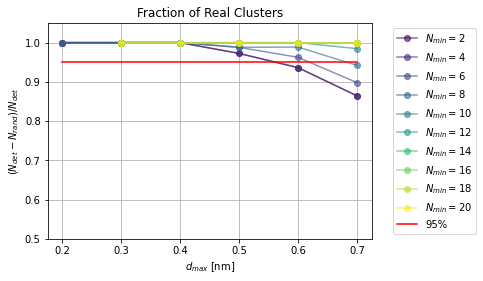

In [33]:
n_min_values = list(range(2, 21, 2))

pgp.plot_real_cluster_ratio_across_swept_param(
    swept_parameters=d_max_values,
    swept_parameter_name="$d_{max}$ [nm]",
    random_runs=random_runs,
    xml_files=xml_files,
    n_min_values=n_min_values
)

plt.ylim(0.5, 1.05)

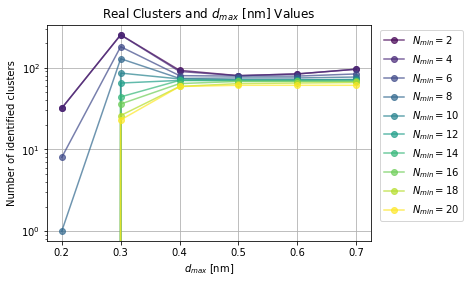

In [34]:
pgp.plot_real_clusters_across_swept_param(
    swept_parameters=d_max_values,
    swept_parameter_name="$d_{max}$ [nm]",
    random_runs=random_runs,
    xml_files=xml_files,
    n_min_values=n_min_values
)

plt.yscale("log")

## Find optimal N_min

Find the smallest $N_{min}$ value for each file that satisfies given threshold of real clusters. Default value = 95%

In [35]:
optimal_n_min_values = pgp.find_smallest_nmin(
    swept_parameters=d_max_values,
    swept_parameter_name="dmax",
    random_runs=random_runs,
    xml_files=xml_files,
    n_min_values=list(range(1, 100, 1)) # go through evey n_min possible up to a high number
)

print(optimal_n_min_values)

dmax: 0.2 | n_min: 1 | fraction: 1.0 | real clusters: 32
dmax: 0.3 | n_min: 1 | fraction: 1.0 | real clusters: 253
dmax: 0.4 | n_min: 1 | fraction: 1.0 | real clusters: 93
dmax: 0.5 | n_min: 1 | fraction: 0.972 | real clusters: 80
dmax: 0.6 | n_min: 6 | fraction: 0.963 | real clusters: 79
dmax: 0.7 | n_min: 9 | fraction: 0.964 | real clusters: 75
[1, 1, 1, 1, 6, 9]


## Plotting Cluster Composition

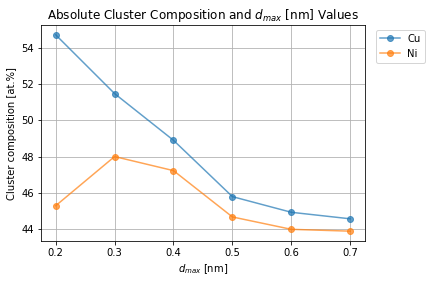

In [36]:
# retrieve the data needed from the cluster stats files for the composition plots
pgp.plot_cluster_composition_across_swept_param_absolute(
    swept_parameters=d_max_values,
    swept_parameter_name="$d_{max}$ [nm]",
    core_ions=core_ions,
    xml_files=xml_files,
    n_min_values_for_swept_parameters=optimal_n_min_values,
    exclude_ions=None
)

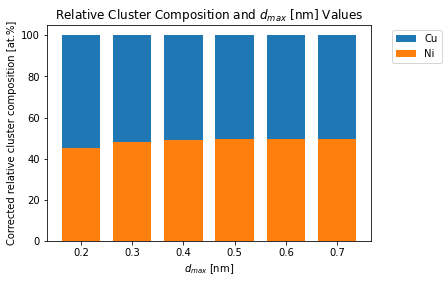

In [37]:
pgp.plot_cluster_composition_across_swept_param_relative(
    swept_parameters=d_max_values,
    swept_parameter_name="$d_{max}$ [nm]",
    core_ions=core_ions,
    xml_files=xml_files,
    n_min_values_for_swept_parameters=optimal_n_min_values,
    exclude_ions=None
)

### Saving images

If you would like to save any of the graphs plotted above, insert this line at the bottom of the cell:
`plt.savefig("examples/name_of_the_plot.png", dpi=300)`.